# Progress Report: Analysis On Factors Leading to Obesity in America
## Project Introduction/Changes
With obesity at all time rates in the United States it is important to understand the individuals most at risk. This analysis is focused on the critical issue of obesity among individuals in America, exploring data from selected population characteristics. This information was made available by the Centers of Disease Control and Prevention (CDC). Our goals are to investigate if race plays a role in being at risk of obesity, if income is the leading factor in obesity, and to explore other interesting relationships found within the data. We have not made any changes to our scope since the project proposal.

**Github Repository**: https://github.com/uic-cs418/group-project-mind-masters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from obesity_children import * #cleaning python file
import data1_helper # for analyzing data 1

## Reading Data / Cleaning Data
**Data - Obesity Among Children and Adolescents 2-19**

In [2]:
obesity_children = pd.read_csv("Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_States.csv")
obesity_single_unique = remove_single_unique(obesity_children)
obesity_clean = remove_num_columns(obesity_single_unique)
sex_race_his_obesity, race_his_obesity, total_obesity, poverty_obesity, sex_obesity, age_obesity = final_clean(obesity_clean)
poverty_obesity.head(n = 2)

,PANEL,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE,SE,FLAG
171,2-19 years,Percent of poverty level,Below 100%,1988-1994,2-19 years,12.6,1.2,NaN
172,2-19 years,Percent of poverty level,Below 100%,1999-2002,2-19 years,17.6,1.1,NaN


**Data - Obesity Among Adults 20+**

In [3]:
obesity_adult = pd.read_csv("Normal_weight__overweight__and_obesity_among_adults_aged_20_and_over__by_selected_characteristics__United_States.csv")
panelDict, unitDict, stubNameDict, stubLabelDict, yearDict, ageDict = data1_helper.getMapping(obesity_adult)
raceGender_df = data1_helper.cleanGenderRace(obesity_adult)
age_df = data1_helper.cleanAge(obesity_adult)
raceGender_df.head(2)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG,Gender,Race
49,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Male: Not Hispanic or Latino: White only,3.111,2015-2018,10,20 years and over,1.0,23.4,1.4,.,Male,White
59,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Sex and race and Hispanic origin,4,Female: Not Hispanic or Latino: White only,3.112,2015-2018,10,20 years and over,1.0,31.9,1.7,.,Female,White


## Exploratory Data Analysis (EDA)

**Data - Obesity Among Children and Adolescents 2-19, Obesity Among Adults 20+**
+ Structure: The columns consists of objects such as age range, poverty level, year range, flag and quantitative data such as estimate, standard error. The flag tells us if the data is normal, unrelaible(standard error over 20%), and no data.
+ Granularity: Each row provides an obesity percentage estimation given the parameters from a sample.
+ Scope: Obesity percentage of individuals 2-19 in America from 1988-2018.
+ Temporality: The data spans from 1988 to 2018. However there is more data of recent years.
+ Faithfulness (All dataset): The data is trustworthy as it comes from the CDC which is a reputable source and collects data from healthcare areas.

## Visualizations

**Visual 1 - Data - Obesity Among Children and Adolescents 2-19**

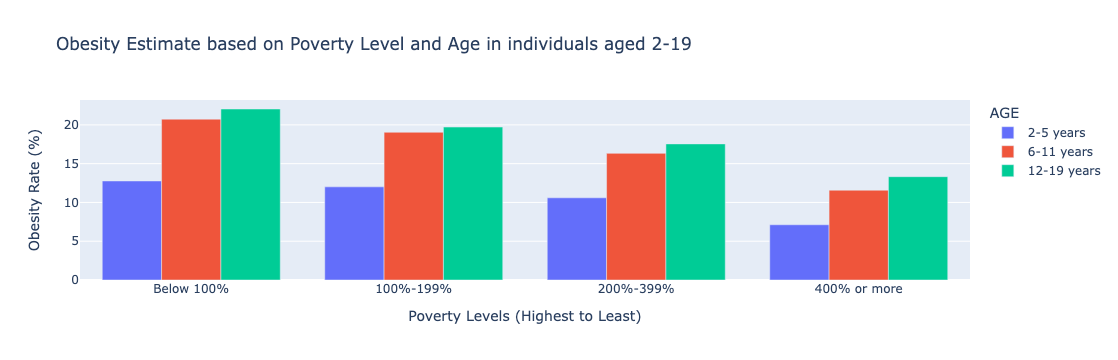

In [76]:
obesity_Visual1(poverty_obesity)

One of our hypothesis before analyzing the data was that income was the leading contributing factor of obesity. 

**Visual 2 - Data - Obesity Among Adults 20+**

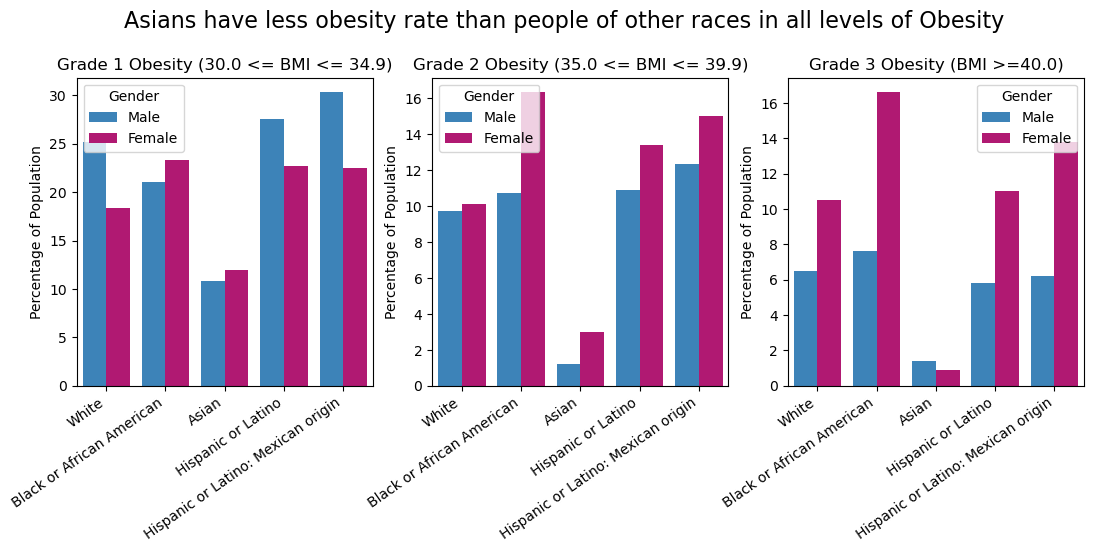

In [5]:
data1_helper.obesityRaceVsObesity(raceGender_df)

Explanation:

## Machine Learning Analysis

**Question**: What will be the rate of obesity in the US in 2024?

In [6]:
from scipy import stats
import sklearn.metrics as sm

# prepare data for ML
middleYearDict = data1_helper.getMiddleYear(yearDict)
generalObesity = data1_helper.getFilteredData(obesity_adult, 1, 3, 1, 1.1, middleYearDict)
x = generalObesity["MiddleYear"]
y = generalObesity["ESTIMATE"]

In [7]:
# baseline ML model: mean
baselineML = data1_helper.MeanModel()
baselineML.fit(x, y)
baseline_error = data1_helper.evaluateModel(baselineML, x, y)
baseline_error

22.442400000000003

In [8]:
# linear regression model
linRegressML = data1_helper.LinearRegressionModel()
linRegressML.fit(x, y)
linRegress_error = data1_helper.evaluateModel(linRegressML, x, y)
linRegress_error

0.5901431713657087

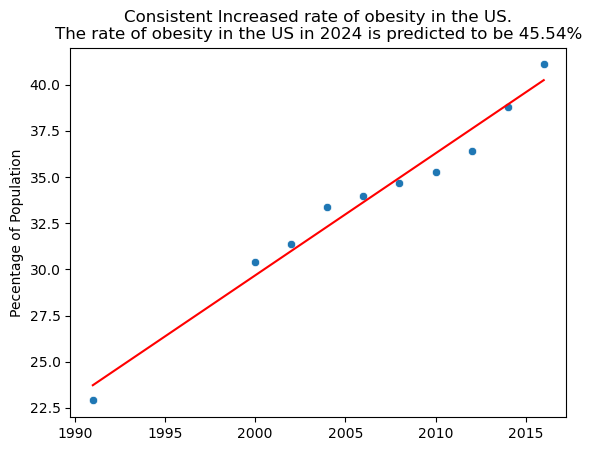

In [9]:
# graphing machine learning model
plt.figure()

# plot the data
ax = sns.scatterplot(generalObesity, x="MiddleYear", y="ESTIMATE")
ax.set_xlabel(None)
ax.set_ylabel("Pecentage of Population")

# plot the linear regression
predictedY = linRegressML.predict(x)
predicted2024 = round(linRegressML.predict([2024])[0], 2)
title = "Consistent Increased rate of obesity in the US.\nThe rate of obesity in the US in 2024 is predicted to be " + str(predicted2024) + "%"
plt.title(title)
plt.plot(x, predictedY, 'r')

## Reflections 
**What has been the hardest part of the project encountered so far?** 
+ During the cleaning and pre-processing of our three data sets, we realized that many of the column names were structured differently than expected. We did a deep analysis of the unique values of each column and how each column correlated with the other columns such as poverty level/income. Additionally, we took steps to validate our data by separating data frames for the factors of interest (e.g. poverty level, education, race) before conducting extensive EDA such as cross-validation for our ML approach of predicting future obesity levels. Overall, it was difficult but necessary for us to take these preliminary steps during EDA so that we could avoid bias/errors in our statistical analysis.
  
**What are your intial insights?**

Some things that we realized while cleaning and looking over the data especially when we started our analysis:
+ The state of residence affects the obesity rate. 
+ Trend of lower obesity rates the higher income level
+ Obesity rates tend to rise as we age, peaking at the 45-54 range.
+ Non-Hispanic Black, Hispanic/Latino, and Hawaiian/Pacific Islanders have the highest obesity rates
+ Obesity rates are marginally highest in those with less than a high school education
+ Asians have lower obesity levels than other races
 

**Are there any concrete results you can show at this point? If not, why not?**
+ We can make some assumptions but can’t say something is concrete 100% because we only have data from around 10000 people, so saying that our insights and results are concrete is unrealistic. So far we have found great insights about which factors affect obesity, however, with more analysis we will be able to show concrete information regarding our hypothesis.
  
**Going forward, what are the current biggest problems you’re facing?**
+ We have chosen three datasets to analyze for this project and we have successfully managed to analyze the first two completely. The third has been more cumbersome due to its extensive size compared to the first two data sets. Additionally, the data set itself is unstructured based on how we want to conduct our analysis, so we’re also brainstorming what data must be excluded and justifying our reasons to give an accurate analysis.

  
**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**
+ To date, we are up to track on the project and have cleaned most of the data, performed EDA, created multiple visualizations, and performed two ML analyses. After we finish up our analysis with the third data set, we’ll work on perfecting machine learning and coming up with more unique visualizations that can help convey the results.
  
**Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?**
+ Proceeding with this project is worth it as our project can understand those at most risk and the factors that lead them to be at risk. Our projects analysis can be relevant to clients such as the city, state, country, healthcare professionals, and more.
## Next Steps
**What do you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.**
+ We plan to accomplish finishing our interactive map visualization, correlation analysis, and analyze the third dataset to a greater extent. To evaluate whether our project achieved the goals we set out in the beginning.
